<h1>(Crop Recommender System🦠)</h1>

V1.0.0
<br>
[Author: Raghav👨‍💻]
<br>
Date[Fri 9 Jun 23]


In [123]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

<h3>Understanding the Dataset 💽</h3>


In [124]:
data_path = '/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv'
df = pd.read_csv(data_path)

In [125]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [126]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [127]:
print(f"Rows, Cols = {df.shape}")
print(f"Rows * Cols = {df.size}")

Rows, Cols = (2200, 8)
Rows * Cols = 17600


In [128]:
# The features of our dataset
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [129]:
# The labels on which recommendation will be performed
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: >

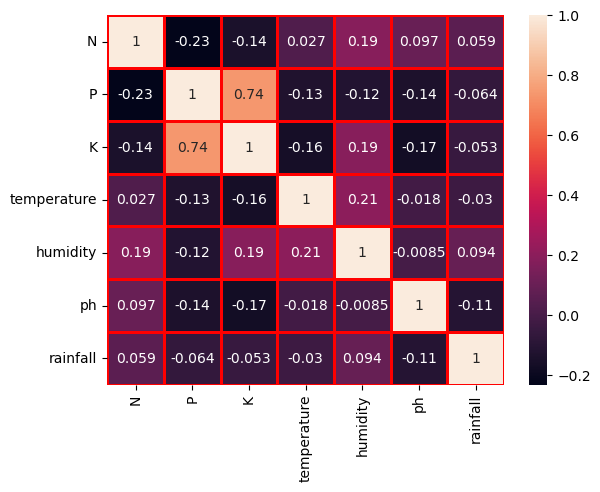

In [130]:
# Making a heatmap of the dataset correlation : including only numerical data
linewidth = 2
linecolor = "red"

sns.heatmap(data=df.select_dtypes(include='number').corr(),
            annot=True, 
            linewidth = linewidth, 
            linecolor = linecolor)

In [131]:
from sklearn.model_selection import train_test_split
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

xtrain, xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size = 0.2,
                                                random_state = None)

In [132]:
# Defining a dictionary such that key = modelname and value = accuracy of the model
best_model = {}

<h3>Cross Validation Accuracy</h3>

In [133]:
from sklearn.model_selection import cross_val_score

def cross_val_accuracy(model):
    # This function calculates the mean cross validation accuracy
    score = cross_val_score(model, features, target,cv=5)
    #get the mean of each fold 
    return score.mean() * 100

<h3>Saving the models 📦</h3>

In [134]:
import pickle

def save_model(model, modelname):
    #This function expects a model and a modelname(with .pkl extension)
    # Setting model path
    pkl_filename = '/kaggle/working/'+modelname
    # Open the file to save as pkl file
    model_pkl = open(pkl_filename, 'wb')
    #dump model
    pickle.dump(model, model_pkl)
    # Close the pickle instances
    model_pkl.close()

<h3>Logistic Regression</h3>

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Create an instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the scaled training data
logreg.fit(xtrain_scaled, ytrain)

# Use the model to make predictions on the test data
ypred = logreg.predict(xtest_scaled)

accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Logistic Regression"] = accuracy*100
print(best_model)

Accuracy: 0.9636363636363636

{'Logistic Regression': 96.36363636363636}


In [136]:
from sklearn.pipeline import make_pipeline

# Create a pipeline with data scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Perform cross-validation and calculate accuracy
score = cross_val_score(pipeline, features, target, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-Validation Accuracy Scores:", score.mean() * 100)

Cross-Validation Accuracy Scores: 97.13636363636363


In [137]:
save_model(logreg,'logreg.pkl')

<h3>Decision Tree 🌳</h3>

In [138]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion = "entropy",
                                     random_state = None,
                                     max_depth = 5)
# Fitting the training set to create a model
DecisionTree.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = DecisionTree.predict(xtest)
# Checking whether the predicted y for test(x) matches actual test(y)
accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Decision Tree"] = accuracy*100
print(best_model)

Accuracy: 0.9318181818181818

{'Logistic Regression': 96.36363636363636, 'Decision Tree': 93.18181818181817}


In [139]:
print(f"Cross Validation Accuracy {cross_val_accuracy(DecisionTree)}")

Cross Validation Accuracy 91.45454545454544


In [140]:
save_model(DecisionTree,'DecisionTree.pkl')

<h3>Random Forest</h3>

In [141]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=20, random_state=None)

# Fitting the training set to create a model
RandomForest.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = RandomForest.predict(xtest)

accuracy = metrics.accuracy_score(ypred, ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Random Forest"] = accuracy*100
print(best_model)

Accuracy: 0.9931818181818182

{'Logistic Regression': 96.36363636363636, 'Decision Tree': 93.18181818181817, 'Random Forest': 99.31818181818181}


In [142]:
print(f"Cross Validation Accuracy {cross_val_accuracy(RandomForest)}")

Cross Validation Accuracy 99.31818181818181


In [143]:
save_model(RandomForest,'RandomForest.pkl')

<h3> Gaussian Naive Bayes ⚾️🥎</h3>


In [144]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

# Fitting the training set to create a model
NaiveBayes.fit(xtrain,ytrain)
# Using test(x) to find y
ypred = NaiveBayes.predict(xtest)

accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["Naive Bayes"] = accuracy*100
print(best_model)

Accuracy: 0.9954545454545455

{'Logistic Regression': 96.36363636363636, 'Decision Tree': 93.18181818181817, 'Random Forest': 99.31818181818181, 'Naive Bayes': 99.54545454545455}


In [145]:
print(f"Cross Validation Accuracy {cross_val_accuracy(NaiveBayes)}")

Cross Validation Accuracy 99.50000000000001


In [146]:
save_model(NaiveBayes,'NaiveBayes.pkl')

<h3>Support Vector Machine</h3>

In [147]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)
# transform testing dataabs
x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
ypred = SVM.predict(x_test_norm)

accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["SVM"] = accuracy*100
print(best_model)

Accuracy: 0.9795454545454545

{'Logistic Regression': 96.36363636363636, 'Decision Tree': 93.18181818181817, 'Random Forest': 99.31818181818181, 'Naive Bayes': 99.54545454545455, 'SVM': 97.95454545454545}


In [148]:
print(f"Cross Validation Accuracy {cross_val_accuracy(SVM)}")

Cross Validation Accuracy 98.27272727272728


In [149]:
save_model(SVM,'SVM.pkl')

<h3>XG Boost 🚀</h3>

In [150]:
import xgboost as xgb
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y' into integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(ytrain)

# Create and fit the XGBoost classifier
XGB = xgb.XGBClassifier()
XGB.fit(xtrain, y_encoded)

# Predict the labels for the test set
ypred = XGB.predict(xtest)

# Decode the predicted labels back to their original string labels
ypred_decoded = label_encoder.inverse_transform(ypred)

# Calculate and print the accuracy
accuracy = metrics.accuracy_score(ytest, ypred_decoded)
print(f"Accuracy: {accuracy}",end='\n\n')

# Adding the model to our dictionary
best_model["XGB"] = accuracy*100
print(best_model)

Accuracy: 0.9931818181818182

{'Logistic Regression': 96.36363636363636, 'Decision Tree': 93.18181818181817, 'Random Forest': 99.31818181818181, 'Naive Bayes': 99.54545454545455, 'SVM': 97.95454545454545, 'XGB': 99.31818181818181}


In [151]:
# Perform cross-validation and calculate the mean accuracy
cross_val_scores = cross_val_score(XGB, features, target_encoded, cv=5)
cross_val_accuracy = cross_val_scores.mean()

print(f"Cross-Validation Accuracy: {cross_val_accuracy}")

Cross-Validation Accuracy: 0.9922727272727274


In [152]:
save_model(XGB,'XGB.pkl')

<h3> Tensorflow </h3>

In [165]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the target labels and transform them
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

# Build the model
model = Sequential()
# Shape (None,7)
model.add(Dense(64, activation='relu', input_shape=(7,)))
model.add(Dense(128, activation='relu'))  # Additional layer
model.add(Dense(128, activation='relu'))  # Additional layer
model.add(Dense(64, activation='relu'))  # Additional layer
model.add(Dense(22, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callback
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99 and logs.get('val_accuracy') >= 0.99:
            self.model.stop_training = True

# Create an instance of the callback
callback = AccuracyCallback()

# Train the model with the encoded target labels and the callback
model.fit(xtrain_scaled, ytrain_encoded, epochs=100, batch_size=32, validation_data=(xtest_scaled, ytest_encoded), callbacks=[callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(xtest_scaled, ytest_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/100
55/55 [==============================] - 1s 7ms/step - loss: 2.2174 - accuracy: 0.4722 - val_loss: 1.0803 - val_accuracy: 0.7114
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.8278 - val_loss: 0.3668 - val_accuracy: 0.9091
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.9074 - val_loss: 0.2459 - val_accuracy: 0.9318
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1959 - accuracy: 0.9335 - val_loss: 0.1923 - val_accuracy: 0.9432
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1412 - accuracy: 0.9534 - val_loss: 0.1531 - val_accuracy: 0.9500
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 0.1309 - accuracy: 0.9591 - val_loss: 0.1648 - val_accuracy: 0.9523
Epoch 7/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 0.9682 - val_loss: 0.1014 - val_accuracy: 0.9636
Epoch 8/100
5

In [166]:
best_model['TensorFlow'] = test_acc*100
print(best_model)

{'Logistic Regression': 96.36363636363636, 'Decision Tree': 93.18181818181817, 'Random Forest': 99.31818181818181, 'Naive Bayes': 99.54545454545455, 'SVM': 97.95454545454545, 'XGB': 99.31818181818181, 'TensorFlow': 99.09090995788574}


In [167]:
# Save the model
model.save("tensorflow_model")

<h3> Comparing all models 📊 </h3>

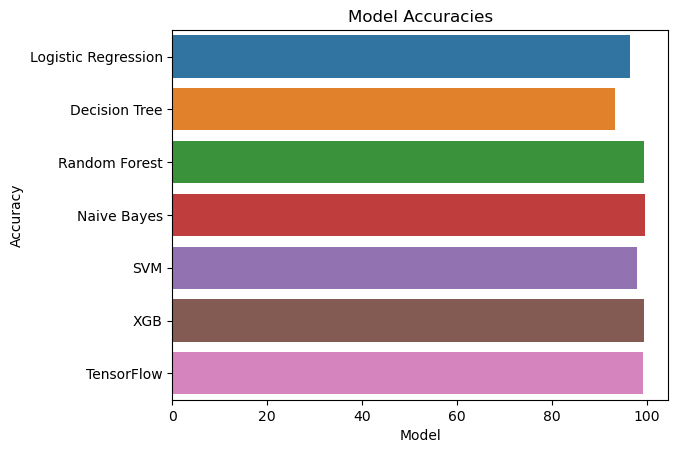

In [168]:
# Extract model names and accuracies from the best_model dictionary
accuracies = list(best_model.values())
model_names = list(best_model.keys())

# Create a bar plot using seaborn
sns.barplot(x=accuracies, y=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


In [169]:
# Sort the dictionary items by values in descending order
sorted_items = sorted(best_model.items(), key=lambda x: x[1], reverse=True)

# Print the keys and values in descending order
for key, value in sorted_items:
    print(f"{key}: {value}")

Naive Bayes: 99.54545454545455
Random Forest: 99.31818181818181
XGB: 99.31818181818181
TensorFlow: 99.09090995788574
SVM: 97.95454545454545
Logistic Regression: 96.36363636363636
Decision Tree: 93.18181818181817


In [170]:
max_key = max(best_model, key=best_model.get)
max_value = best_model[max_key]

print(f"Key: {max_key}, Value: {max_value}")

Key: Naive Bayes, Value: 99.54545454545455


<h3> Using the model 🦾 </h3>

In [159]:
# Randomly select one row from the DataFrame
random_row = df.sample(n=1)

print(random_row)

# Extract the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the random row
random_values = random_row[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values


      N   P   K  temperature   humidity        ph   rainfall     label
248  57  60  84    19.103428  17.261845  6.586777  75.491012  chickpea


In [160]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
prediction = NaiveBayes.predict(data_with_feature_names)
print(prediction)

['chickpea']


In [161]:
# Randomly select one row from the DataFrame
random_row = df.sample(n=1)

print(random_row)

# Extract the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the random row
random_values = random_row[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values


       N   P   K  temperature   humidity        ph    rainfall   label
1705  70  68  45    33.835086  92.854702  6.991626  203.404403  papaya


In [162]:
data = np.array(random_values)
data_with_feature_names = pd.DataFrame(data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
prediction = NaiveBayes.predict(data_with_feature_names)
print(prediction)

['papaya']
